In [5]:
cd ../jecs

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs


In [2]:
import torch
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cpu



In [7]:
def foo():
    yield 1
    print('foo')
    yield 2
    print('foo')
    yield 3

In [10]:
for i in foo():
    print(str(i)+"im here!")

1im here!
foo
2im here!
foo
3im here!


In [3]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 

fp='../test_files/00BF1FDD-65BC-E311-A63F-00259073E3D0_poet.root'

pts2, etas2, area2, npvs2, gen_pts2, jecs2 = list(load_root_files([fp]))[0]
mask = pts2 > 450
pts2 = pts2[mask]
etas2 = etas2[mask]
area2 = area2[mask]
npvs2 = npvs2[mask]
gen_pts2 = gen_pts2[mask]
jecs2 = jecs2[mask]


ModuleNotFoundError: No module named 'dataset'

In [20]:
pts2,jecs2

(array([513.2901 , 467.62134, 588.1106 , 458.53036, 637.0216 , 503.31882,
        502.9872 , 451.3839 , 470.25613, 479.92496, 524.3087 , 523.32416,
        489.10095, 698.3761 , 506.8922 ], dtype=float32),
 array([1.0376376, 1.0346445, 1.0571502, 1.0357634, 1.0423253, 1.0274358,
        1.0452949, 1.034287 , 1.0269151, 1.0409058, 1.0446347, 1.033016 ,
        1.0327853, 1.0365775, 1.037209 ], dtype=float32))

In [21]:
jec_dataset2 = JetEnergyCorrectionDataset(pts2, etas2, area2, npvs2, gen_pts2, jecs2)

In [6]:
# Load the dataset
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 


pts, etas, area, npvs, gen_pts, jecs = load_energy_flow()
"""
pts.extend(pts2)
etas.extend(etas2)
area.extend(area2)
npvs.extend(npvs2)
gen_pts.extend(gen_pts2)
jecs.extend(jecs2)"""

jec_dataset = JetEnergyCorrectionDataset(pts, etas, area, npvs, gen_pts, jecs)

In [10]:
scaler = jec_dataset.scaler_x
mean = scaler.mean_.tolist()
variance = scaler.var_.tolist()

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a StandardScaler object
scaler2 = StandardScaler()

# Set the mean and variance
scaler2.mean_ = np.array(mean)
scaler2.var_ = np.array(variance)

# Optionally, set the scale_ attribute if you need it
scaler2.scale_ = np.sqrt(scaler.var_)

In [15]:
x=np.transpose(np.array([pts,etas,area,npvs,gen_pts]))
y=np.array(jecs)

x2 = scaler2.transform(x)

In [17]:
x3=scaler.transform(x)
x3

array([[-1.01561516, -0.26506422,  0.04247995,  0.93917926, -1.07676895],
       [-0.98121725, -0.11646312,  0.04247995,  2.07580431, -0.94399904],
       [-1.06054311,  0.6507349 ,  0.39638105,  0.93917926, -1.13789056],
       ...,
       [ 2.70954459, -0.79117548, -2.08093302, -0.48160206,  2.70109314],
       [ 2.58092807,  0.63069834,  0.04247995, -0.48160206,  2.63474224],
       [ 2.452069  , -0.21349145,  0.39638105, -0.1974458 ,  2.46039345]])

In [16]:
x2

array([[-1.01561516, -0.26506422,  0.04247995,  0.93917926, -1.07676895],
       [-0.98121725, -0.11646312,  0.04247995,  2.07580431, -0.94399904],
       [-1.06054311,  0.6507349 ,  0.39638105,  0.93917926, -1.13789056],
       ...,
       [ 2.70954459, -0.79117548, -2.08093302, -0.48160206,  2.70109314],
       [ 2.58092807,  0.63069834,  0.04247995, -0.48160206,  2.63474224],
       [ 2.452069  , -0.21349145,  0.39638105, -0.1974458 ,  2.46039345]])

Test MSE: 0.3315191864967346


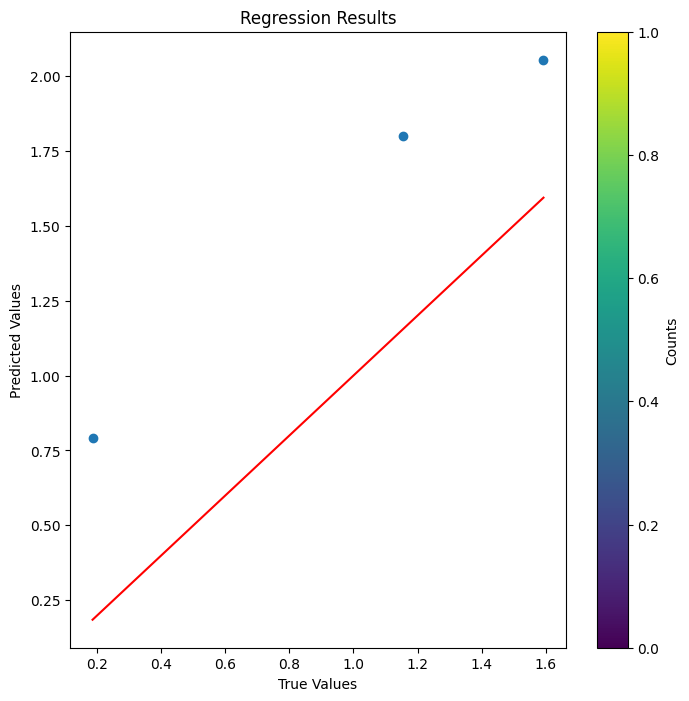

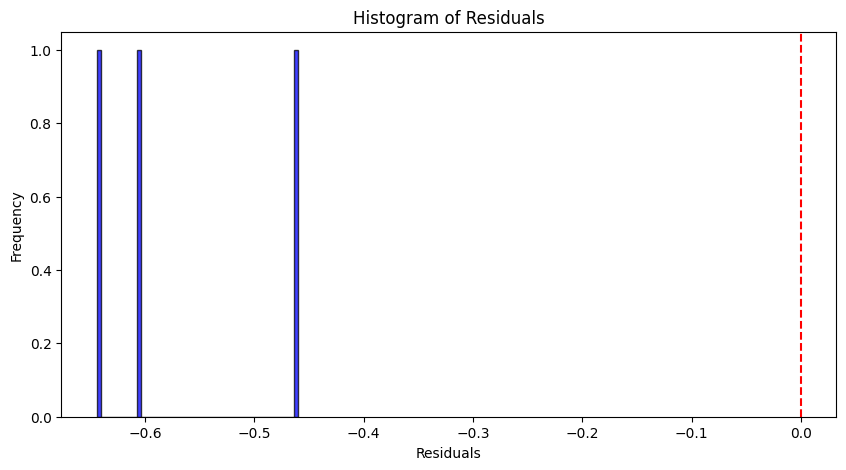

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:57: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="red", label="raw")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:59: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="purple", label="corrected")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:61: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_pred / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="orange", label="corrected predicted")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:67: RuntimeWarning: divide by zero encountered in divide
  h2 = ax[1].hist2d(pts_bin * jec_bin / gen_pts_bin, etas_bin,
/Users/barakmargalit/Desktop/codewars/Ex

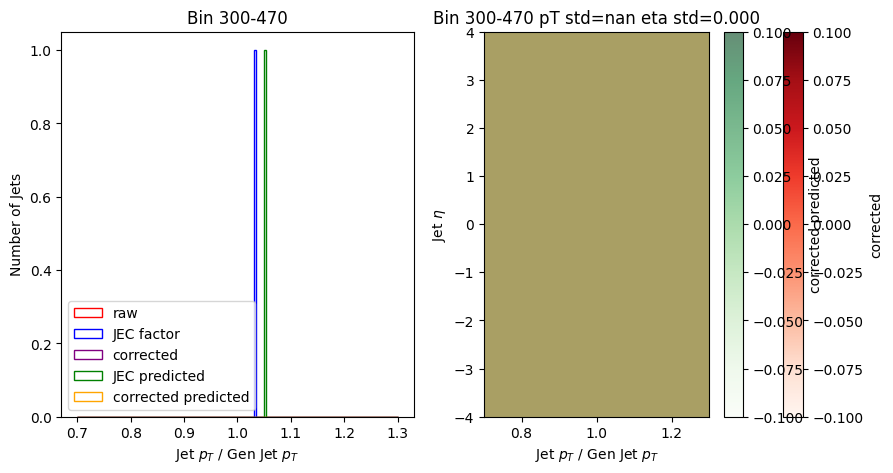

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:57: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="red", label="raw")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:59: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="purple", label="corrected")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:61: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_pred / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="orange", label="corrected predicted")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:67: RuntimeWarning: divide by zero encountered in divide
  h2 = ax[1].hist2d(pts_bin * jec_bin / gen_pts_bin, etas_bin,
/Users/barakmargalit/Desktop/codewars/Ex

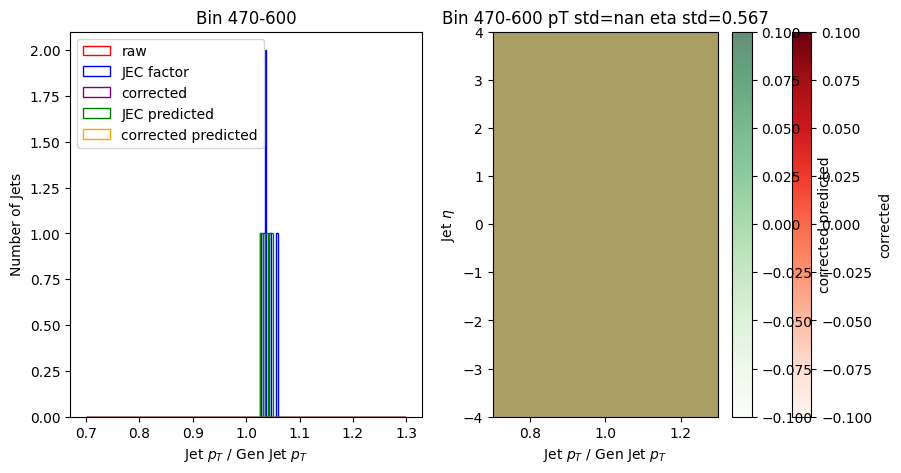

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:57: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="red", label="raw")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:59: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="purple", label="corrected")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:61: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_pred / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="orange", label="corrected predicted")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval_multiple_src.py:67: RuntimeWarning: divide by zero encountered in divide
  h2 = ax[1].hist2d(pts_bin * jec_bin / gen_pts_bin, etas_bin,
/Users/barakmargalit/Desktop/codewars/Ex

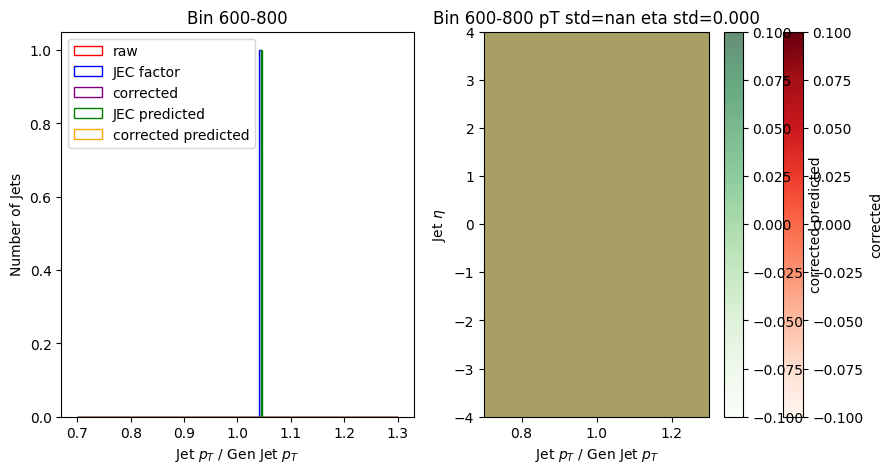

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [23]:
import importlib
import eval_multiple_src as eval
from j_model import ShallowMLP

importlib.reload(eval)
eval.run(jec_dataset2)